## 作業
   
作業1：試著調整 Random Forest 中的參數，並觀察是否會改變結果？   
作業2：改用其他資料集 (diabetes, wine)，仔細探索一個參數對模型預測力的變化。

## 撰寫方向
- 本作業以 n_estimators 為例，探討不同數量決策樹下，隨機森林準確度差異

In [3]:
from sklearn.datasets import load_diabetes, load_wine
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [7]:
# 讀取 Diabete 資料
diabete = load_diabetes()

# 建立 n_estimators 集合
n_estimatorsList = list(range(100, 10000, 100))

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabete.data, diabete.target, test_size=0.1, random_state=4)

mseList = list()
for oneEstimators in n_estimatorsList:
    # 建立一個隨機森林迴歸模型
    regr = RandomForestRegressor(n_estimators = oneEstimators)
    
    # 將訓練資料丟進去模型訓練
    regr.fit(x_train, y_train)
    
    # 將測試資料丟進模型得到預測結果
    y_pred = regr.predict(x_test)

    # 用均方誤差(Mean squared error) 評估模型成效
    print("n_estimators: {}, Mean squared error: {}".format(oneEstimators, round(mean_squared_error(y_test, y_pred), 2)))

    # 將 MSE 結果儲存起來
    mseList.append(mean_squared_error(y_test, y_pred))

n_estimators: 100, Mean squared error: 3489.88
n_estimators: 200, Mean squared error: 3202.71
n_estimators: 300, Mean squared error: 3209.41
n_estimators: 400, Mean squared error: 3255.78
n_estimators: 500, Mean squared error: 3337.59
n_estimators: 600, Mean squared error: 3271.38
n_estimators: 700, Mean squared error: 3301.81
n_estimators: 800, Mean squared error: 3285.56
n_estimators: 900, Mean squared error: 3361.52
n_estimators: 1000, Mean squared error: 3328.5
n_estimators: 1100, Mean squared error: 3252.41
n_estimators: 1200, Mean squared error: 3334.96
n_estimators: 1300, Mean squared error: 3300.93
n_estimators: 1400, Mean squared error: 3271.08
n_estimators: 1500, Mean squared error: 3271.68
n_estimators: 1600, Mean squared error: 3271.52
n_estimators: 1700, Mean squared error: 3322.29
n_estimators: 1800, Mean squared error: 3283.78
n_estimators: 1900, Mean squared error: 3317.46
n_estimators: 2000, Mean squared error: 3282.42
n_estimators: 2100, Mean squared error: 3303.75
n_

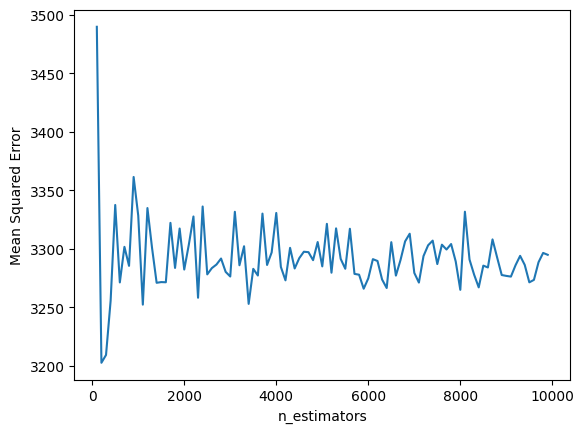

In [9]:
# 繪製 n_estimators 與 MSE 之間的關係
# 從結果中可知，n_estimators 與 MSE 並沒有什麼關係，當 n_estimators 越多時並不會讓 MSE 有效下降。
import matplotlib.pyplot as plt
plt.plot(n_estimatorsList, mseList)
plt.ylabel("Mean Squared Error")
plt.xlabel("n_estimators")
plt.show()

In [10]:
# 讀取 wine 資料
wine = load_wine()

# 建立 n_estimators 集合
n_estimatorsList = list(range(100, 10000, 100))

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

accList = list()
for oneEstimators in n_estimatorsList:

    # 建立一個隨機森林分類模型
    regc = RandomForestClassifier()
    
    # 將訓練資料丟進去模型訓練
    regc.fit(x_train, y_train)
    
    # 將測試資料丟進模型得到預測結果
    y_pred = regc.predict(x_test)

    # 用準確度(Accuracy)評估模型成效
    acc = accuracy_score(y_test, y_pred)
    print("n_estimators: {}, Accuracy: {}".format(oneEstimators, round(acc, 2)))

    # 將 Accuracy 結果儲存起來
    accList.append(acc)

n_estimators: 100, Accuracy: 1.0
n_estimators: 200, Accuracy: 1.0
n_estimators: 300, Accuracy: 1.0
n_estimators: 400, Accuracy: 1.0
n_estimators: 500, Accuracy: 1.0
n_estimators: 600, Accuracy: 1.0
n_estimators: 700, Accuracy: 1.0
n_estimators: 800, Accuracy: 1.0
n_estimators: 900, Accuracy: 1.0
n_estimators: 1000, Accuracy: 1.0
n_estimators: 1100, Accuracy: 1.0
n_estimators: 1200, Accuracy: 1.0
n_estimators: 1300, Accuracy: 1.0
n_estimators: 1400, Accuracy: 1.0
n_estimators: 1500, Accuracy: 1.0
n_estimators: 1600, Accuracy: 1.0
n_estimators: 1700, Accuracy: 1.0
n_estimators: 1800, Accuracy: 1.0
n_estimators: 1900, Accuracy: 1.0
n_estimators: 2000, Accuracy: 1.0
n_estimators: 2100, Accuracy: 1.0
n_estimators: 2200, Accuracy: 1.0
n_estimators: 2300, Accuracy: 1.0
n_estimators: 2400, Accuracy: 1.0
n_estimators: 2500, Accuracy: 1.0
n_estimators: 2600, Accuracy: 1.0
n_estimators: 2700, Accuracy: 1.0
n_estimators: 2800, Accuracy: 1.0
n_estimators: 2900, Accuracy: 1.0
n_estimators: 3000, Acc

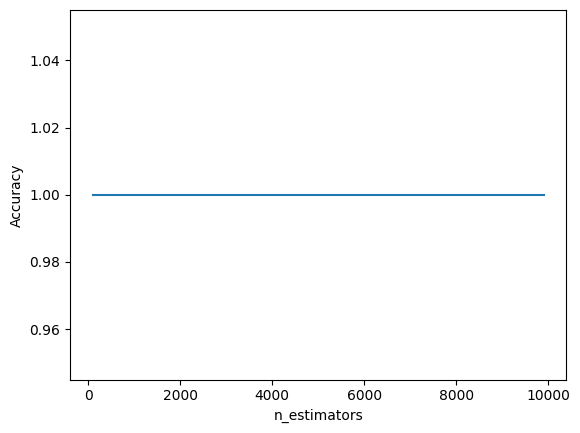

In [11]:
# 繪製 n_estimators 與 MSE 之間的關係
# 從結果中可知，因 Random Forest 模型對 Wine Datasets 來說蠻強大的，不論 n_estimators 設定為多少，Accuracy 都可以是 1.0
import matplotlib.pyplot as plt
plt.plot(n_estimatorsList, accList)
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.show()